In [1]:
# A linear regression learning algorithm example using TensorFlow library.

# Author: Aymeric Damien
# Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [18]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [44]:
# Parameters
learning_rate = 0.01
# training_epochs = 2000
training_epochs = 20
# display_step = 50
display_step = 1

In [45]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

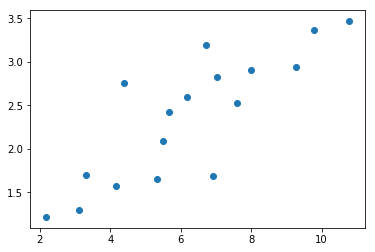

In [46]:
plt.scatter(train_X,train_Y,)

In [47]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [48]:
# Create Model

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [49]:
# Construct a linear model

# @aman - old version code
# activation = tf.add(tf.mul(X, W), b)
activation = tf.add(tf.multiply(X, W), b)

In [50]:
# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*n_samples) #L2 loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

In [51]:
# Initializing the variables

# @aman - old code
# init = tf.initialize_all_variables()
init = tf.initialize_all_variables()

Epoch: 0001 cost= 11.792892456
Epoch: 0002 cost= 4.957837582
Epoch: 0003 cost= 2.256851435
Epoch: 0004 cost= 1.193759203
Epoch: 0005 cost= 0.777879298
Epoch: 0006 cost= 0.616663337
Epoch: 0007 cost= 0.554965436
Epoch: 0008 cost= 0.531720102
Epoch: 0009 cost= 0.523051858
Epoch: 0010 cost= 0.519728124
Epoch: 0011 cost= 0.518244267
Epoch: 0012 cost= 0.517312169
Epoch: 0013 cost= 0.516486526
Epoch: 0014 cost= 0.515632629
Epoch: 0015 cost= 0.514723480
Epoch: 0016 cost= 0.513765037
Epoch: 0017 cost= 0.512770891
Epoch: 0018 cost= 0.511752427
Epoch: 0019 cost= 0.510718644
Epoch: 0020 cost= 0.509675920
Optimization Finished!
cost= 0.509676 W= 0.6173 b= -1.84297


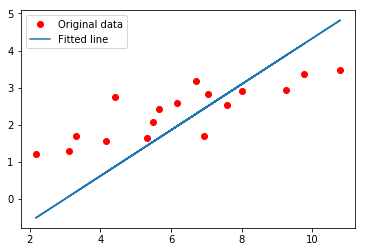

In [52]:
# Launch the graph

cost_list = []
epochs_list = []
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if epoch % display_step == 0:
            t1 = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            t2 = sess.run(W)
            t3 = sess.run(b)
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(t1, \
                "W=", t2, "b=", t3 ) )
            cost_list.append(t1)
            epochs_list.append(epoch)

    print("Optimization Finished!")
    print("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b) )

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [53]:
cost_list

[11.792892,
 4.9578376,
 2.2568514,
 1.1937592,
 0.7778793,
 0.61666334,
 0.55496544,
 0.5317201,
 0.52305186,
 0.51972812,
 0.51824427,
 0.51731217,
 0.51648653,
 0.51563263,
 0.51472348,
 0.51376504,
 0.51277089,
 0.51175243,
 0.51071864,
 0.50967592]

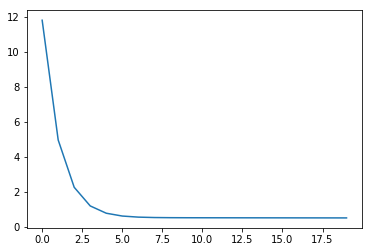

In [54]:
plt.plot(epochs_list, cost_list)

In [55]:
from IPython.display import Image
# @aman - not working 
# Image(filename='linearreg.png')

FileNotFoundError: [Errno 2] No such file or directory: 'linearreg.png'